In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
import warnings
warnings.filterwarnings("ignore")


In [5]:
dfRaw=pd.read_csv('data.csv')
dfRaw.head()

,date,time,latitude,longitude,depth,magnitude
0,2008-11-01,00:31:25,-0.60,98.89553,20.0,2.99
1,2008-11-01,01:34:29,-6.61,129.38722,30.1,5.51
2,2008-11-01,01:38:14,-3.65,127.99068,5.0,3.54
3,2008-11-01,02:20:05,-4.20,128.09700,5.0,2.42
4,2008-11-01,02:32:18,-4.09,128.20047,10.0,2.41


In [6]:
dfRaw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87372 entries, 0 to 87371
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       87372 non-null  object 
 1   time       87372 non-null  object 
 2   latitude   87372 non-null  float64
 3   longitude  87372 non-null  float64
 4   depth      87372 non-null  float64
 5   magnitude  87372 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.0+ MB


In [7]:
dfRaw.isnull().sum()

date         0
time         0
latitude     0
longitude    0
depth        0
magnitude    0
dtype: int64

In [8]:
dfRaw['date'] = pd.to_datetime(dfRaw['date'], format='%Y-%m-%d')
dfRaw['month'] = dfRaw['date'].dt.month
tempList = []
for i in dfRaw['month'].tolist():
    tempVar = 0
    if (i<4):
        tempVar = 1
    elif(i<7):
        tempVar = 2
    elif(i<10):
        tempVar = 3
    else:
        tempVar = 4
    tempList.append(tempVar)
dfRaw['quarter'] = tempList
dfRaw['year'] = dfRaw['date'].dt.year
dfRaw.head()

,date,time,latitude,longitude,depth,magnitude,month,quarter,year
0,2008-11-01,00:31:25,-0.60,98.89553,20.0,2.99,11,4,2008
1,2008-11-01,01:34:29,-6.61,129.38722,30.1,5.51,11,4,2008
2,2008-11-01,01:38:14,-3.65,127.99068,5.0,3.54,11,4,2008
3,2008-11-01,02:20:05,-4.20,128.09700,5.0,2.42,11,4,2008
4,2008-11-01,02:32:18,-4.09,128.20047,10.0,2.41,11,4,2008


In [9]:
dfRaw['time'] = pd.to_datetime(dfRaw['time'], format='%H:%M:%S')
dfRaw['hours'] = dfRaw['time'].dt.hour
dfRaw['minutes'] = dfRaw['time'].dt.minute
tempList = []
for i in dfRaw['hours'].tolist():
    tempVar = ''
    if (i<3):
        tempVar = 'Night'
    elif(i<6):
        tempVar = 'Dawn'
    elif(i<12):
        tempVar = 'Morning'
    elif(i<18):
        tempVar = 'Afternoon'
    else:
        tempVar = 'Evening'
    tempList.append(tempVar)
dfRaw['dayPeriod'] = tempList
dfRaw.head()

,date,time,latitude,longitude,depth,magnitude,month,quarter,year,hours,minutes,dayPeriod
0,2008-11-01,1900-01-01 00:31:25,-0.60,98.89553,20.0,2.99,11,4,2008,0,31,Night
1,2008-11-01,1900-01-01 01:34:29,-6.61,129.38722,30.1,5.51,11,4,2008,1,34,Night
2,2008-11-01,1900-01-01 01:38:14,-3.65,127.99068,5.0,3.54,11,4,2008,1,38,Night
3,2008-11-01,1900-01-01 02:20:05,-4.20,128.09700,5.0,2.42,11,4,2008,2,20,Night
4,2008-11-01,1900-01-01 02:32:18,-4.09,128.20047,10.0,2.41,11,4,2008,2,32,Night


In [10]:
tempList = []
for i in dfRaw['magnitude'].tolist():
    tempVar = ''
    if (i<3):
        tempVar = 'Micro'
    elif (i<4):
        tempVar = 'Minor'
    elif (i<5):
        tempVar = 'Light'
    elif (i<6):
        tempVar = 'Moderate'
    elif (i<7):
        tempVar = 'Strong'
    elif (i<8):
        tempVar = 'Major'
    else:
        tempVar = 'Great'
    tempList.append(tempVar)
dfRaw['earthquakeCategory'] = tempList
dfRaw.head()

,date,time,latitude,longitude,depth,magnitude,month,quarter,year,hours,minutes,dayPeriod,earthquakeCategory
0,2008-11-01,1900-01-01 00:31:25,-0.60,98.89553,20.0,2.99,11,4,2008,0,31,Night,Micro
1,2008-11-01,1900-01-01 01:34:29,-6.61,129.38722,30.1,5.51,11,4,2008,1,34,Night,Moderate
2,2008-11-01,1900-01-01 01:38:14,-3.65,127.99068,5.0,3.54,11,4,2008,1,38,Night,Minor
3,2008-11-01,1900-01-01 02:20:05,-4.20,128.09700,5.0,2.42,11,4,2008,2,20,Night,Micro
4,2008-11-01,1900-01-01 02:32:18,-4.09,128.20047,10.0,2.41,11,4,2008,2,32,Night,Micro


In [11]:
tempList = []
for i in dfRaw['month'].tolist():
    tempVar = ''
    if ((i>3)&(i<11)):
        tempVar = 'Dry'
    else:
        tempVar = 'Rainy'
    tempList.append(tempVar)
dfRaw['season'] = tempList
dfRaw.head()

,date,time,latitude,longitude,depth,magnitude,month,quarter,year,hours,minutes,dayPeriod,earthquakeCategory,season
0,2008-11-01,1900-01-01 00:31:25,-0.60,98.89553,20.0,2.99,11,4,2008,0,31,Night,Micro,Rainy
1,2008-11-01,1900-01-01 01:34:29,-6.61,129.38722,30.1,5.51,11,4,2008,1,34,Night,Moderate,Rainy
2,2008-11-01,1900-01-01 01:38:14,-3.65,127.99068,5.0,3.54,11,4,2008,1,38,Night,Minor,Rainy
3,2008-11-01,1900-01-01 02:20:05,-4.20,128.09700,5.0,2.42,11,4,2008,2,20,Night,Micro,Rainy
4,2008-11-01,1900-01-01 02:32:18,-4.09,128.20047,10.0,2.41,11,4,2008,2,32,Night,Micro,Rainy


In [12]:
tempList = []
for i in dfRaw['depth'].tolist():
    tempVar = ''
    if (i<71):
        tempVar = 'Shallow'
    elif (i<301):
        tempVar = 'Intermediate'
    else:
        tempVar = 'Deep'
    tempList.append(tempVar)
dfRaw['depthCategory'] = tempList
dfRaw.head()

,date,time,latitude,longitude,depth,magnitude,month,quarter,year,hours,minutes,dayPeriod,earthquakeCategory,season,depthCategory
0,2008-11-01,1900-01-01 00:31:25,-0.60,98.89553,20.0,2.99,11,4,2008,0,31,Night,Micro,Rainy,Shallow
1,2008-11-01,1900-01-01 01:34:29,-6.61,129.38722,30.1,5.51,11,4,2008,1,34,Night,Moderate,Rainy,Shallow
2,2008-11-01,1900-01-01 01:38:14,-3.65,127.99068,5.0,3.54,11,4,2008,1,38,Night,Minor,Rainy,Shallow
3,2008-11-01,1900-01-01 02:20:05,-4.20,128.09700,5.0,2.42,11,4,2008,2,20,Night,Micro,Rainy,Shallow
4,2008-11-01,1900-01-01 02:32:18,-4.09,128.20047,10.0,2.41,11,4,2008,2,32,Night,Micro,Rainy,Shallow


In [13]:
df = dfRaw[['year','quarter','month','latitude','longitude','depth','magnitude','dayPeriod','earthquakeCategory','season','depthCategory']].copy()
df = df.loc[(df['year']>2010)&(df['year']<2021)]
df = df.reset_index(drop=True)
df.head()


,year,quarter,month,latitude,longitude,depth,magnitude,dayPeriod,earthquakeCategory,season,depthCategory
0,2011,1,1,-7.53,120.41418,512.6,3.86,Night,Minor,Rainy,Deep
1,2011,1,1,2.32,128.25015,46.1,4.77,Night,Light,Rainy,Shallow
2,2011,1,1,0.90,122.47974,70.1,4.06,Night,Light,Rainy,Shallow
3,2011,1,1,-6.97,107.36543,31.6,3.34,Night,Minor,Rainy,Shallow
4,2011,1,1,-6.00,117.83872,10.0,3.54,Dawn,Minor,Rainy,Shallow


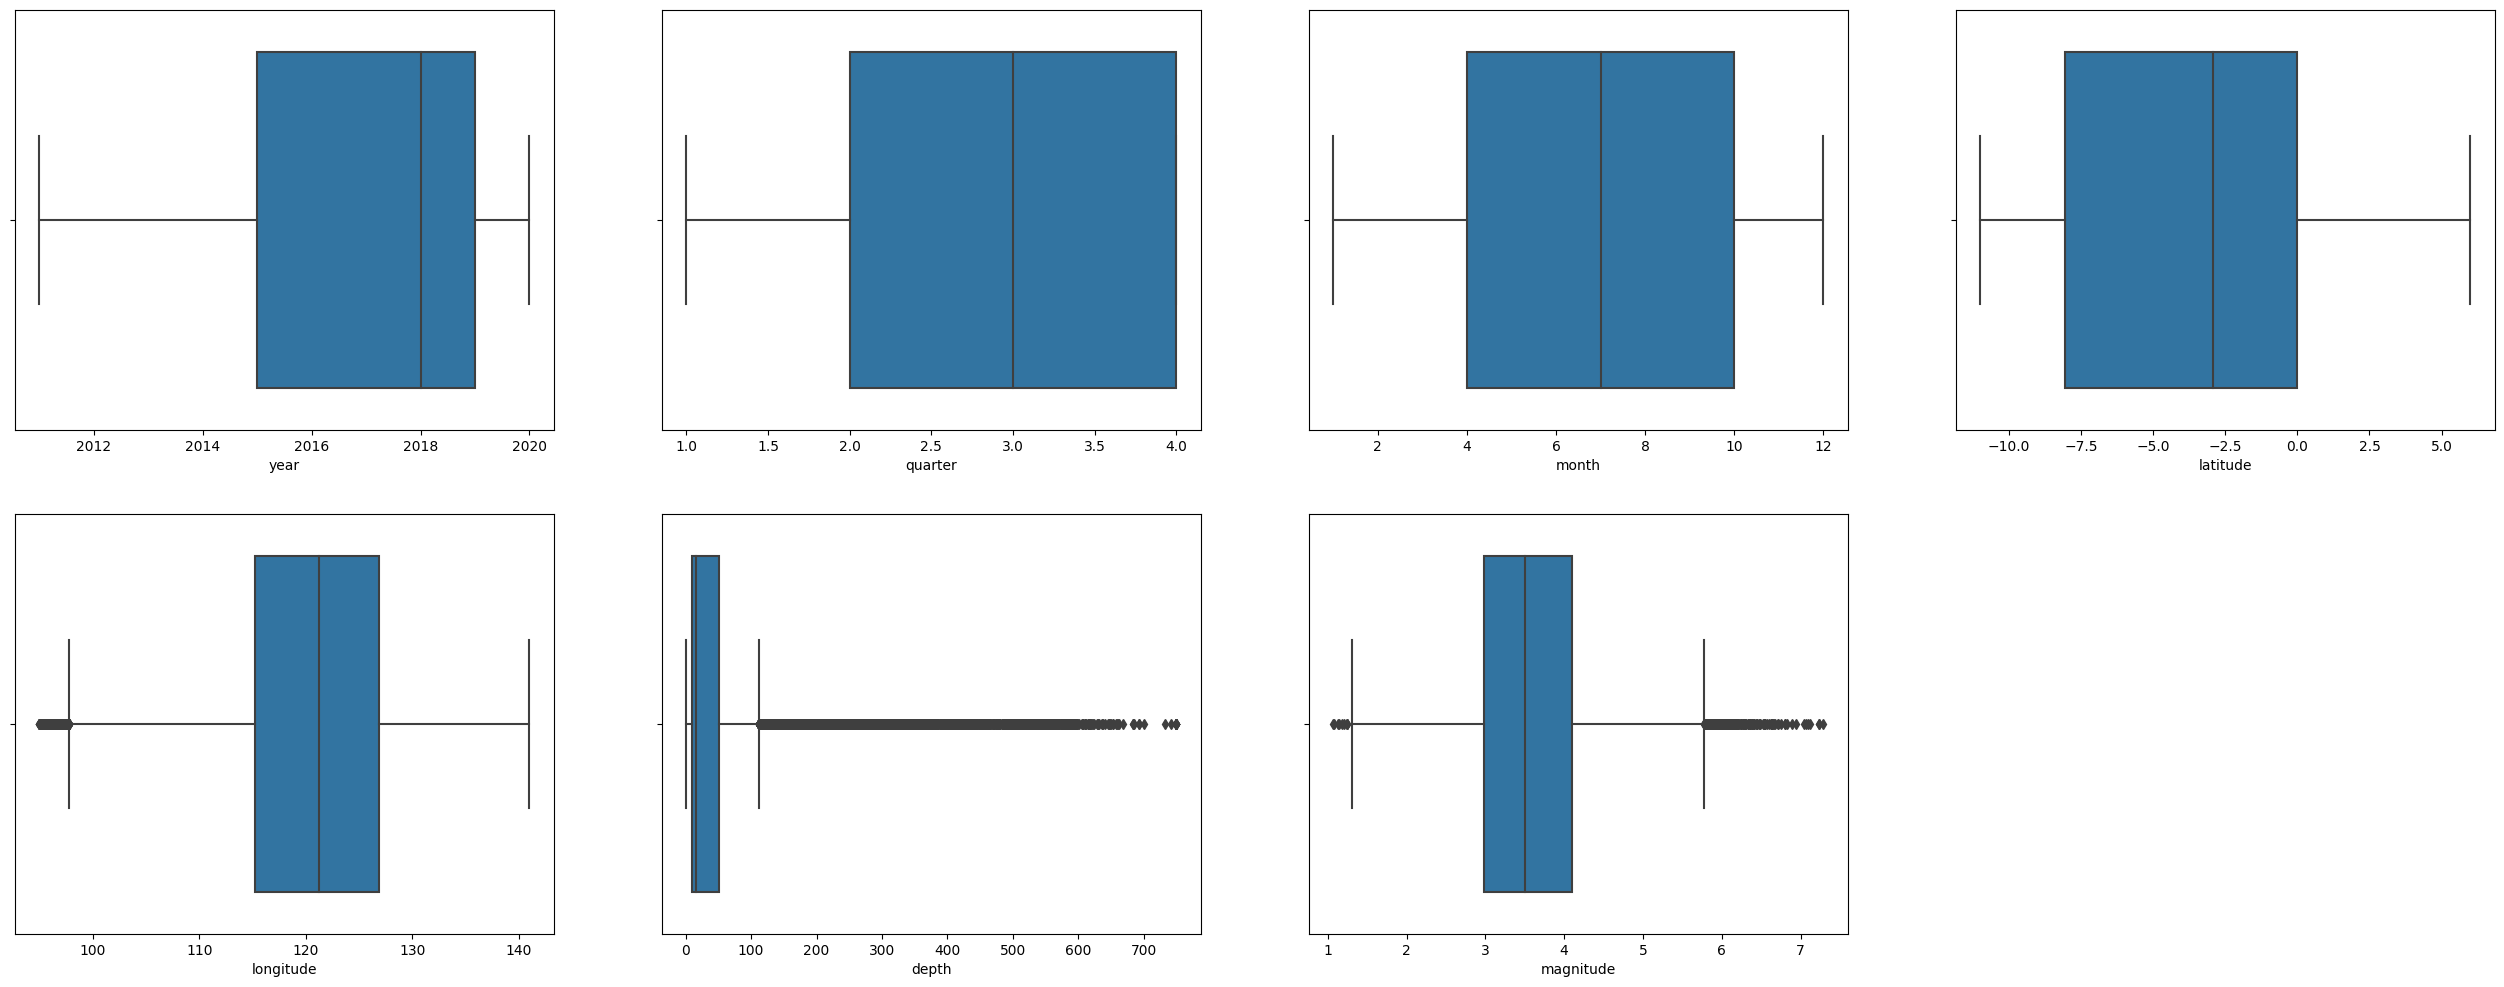

In [14]:
numf = ['year','quarter','month','latitude','longitude','depth','magnitude'] # Numerical Features
catf = ['dayPeriod','earthquakeCategory','season','depthCategory'] # Categorial Features

plt.figure(figsize = (32,12)) 
subplot = 1
for i in numf:
    plt.subplot(2,4,subplot)
    sns.boxplot(data = df, x = i)
    subplot = subplot + 1
    
plt.show()

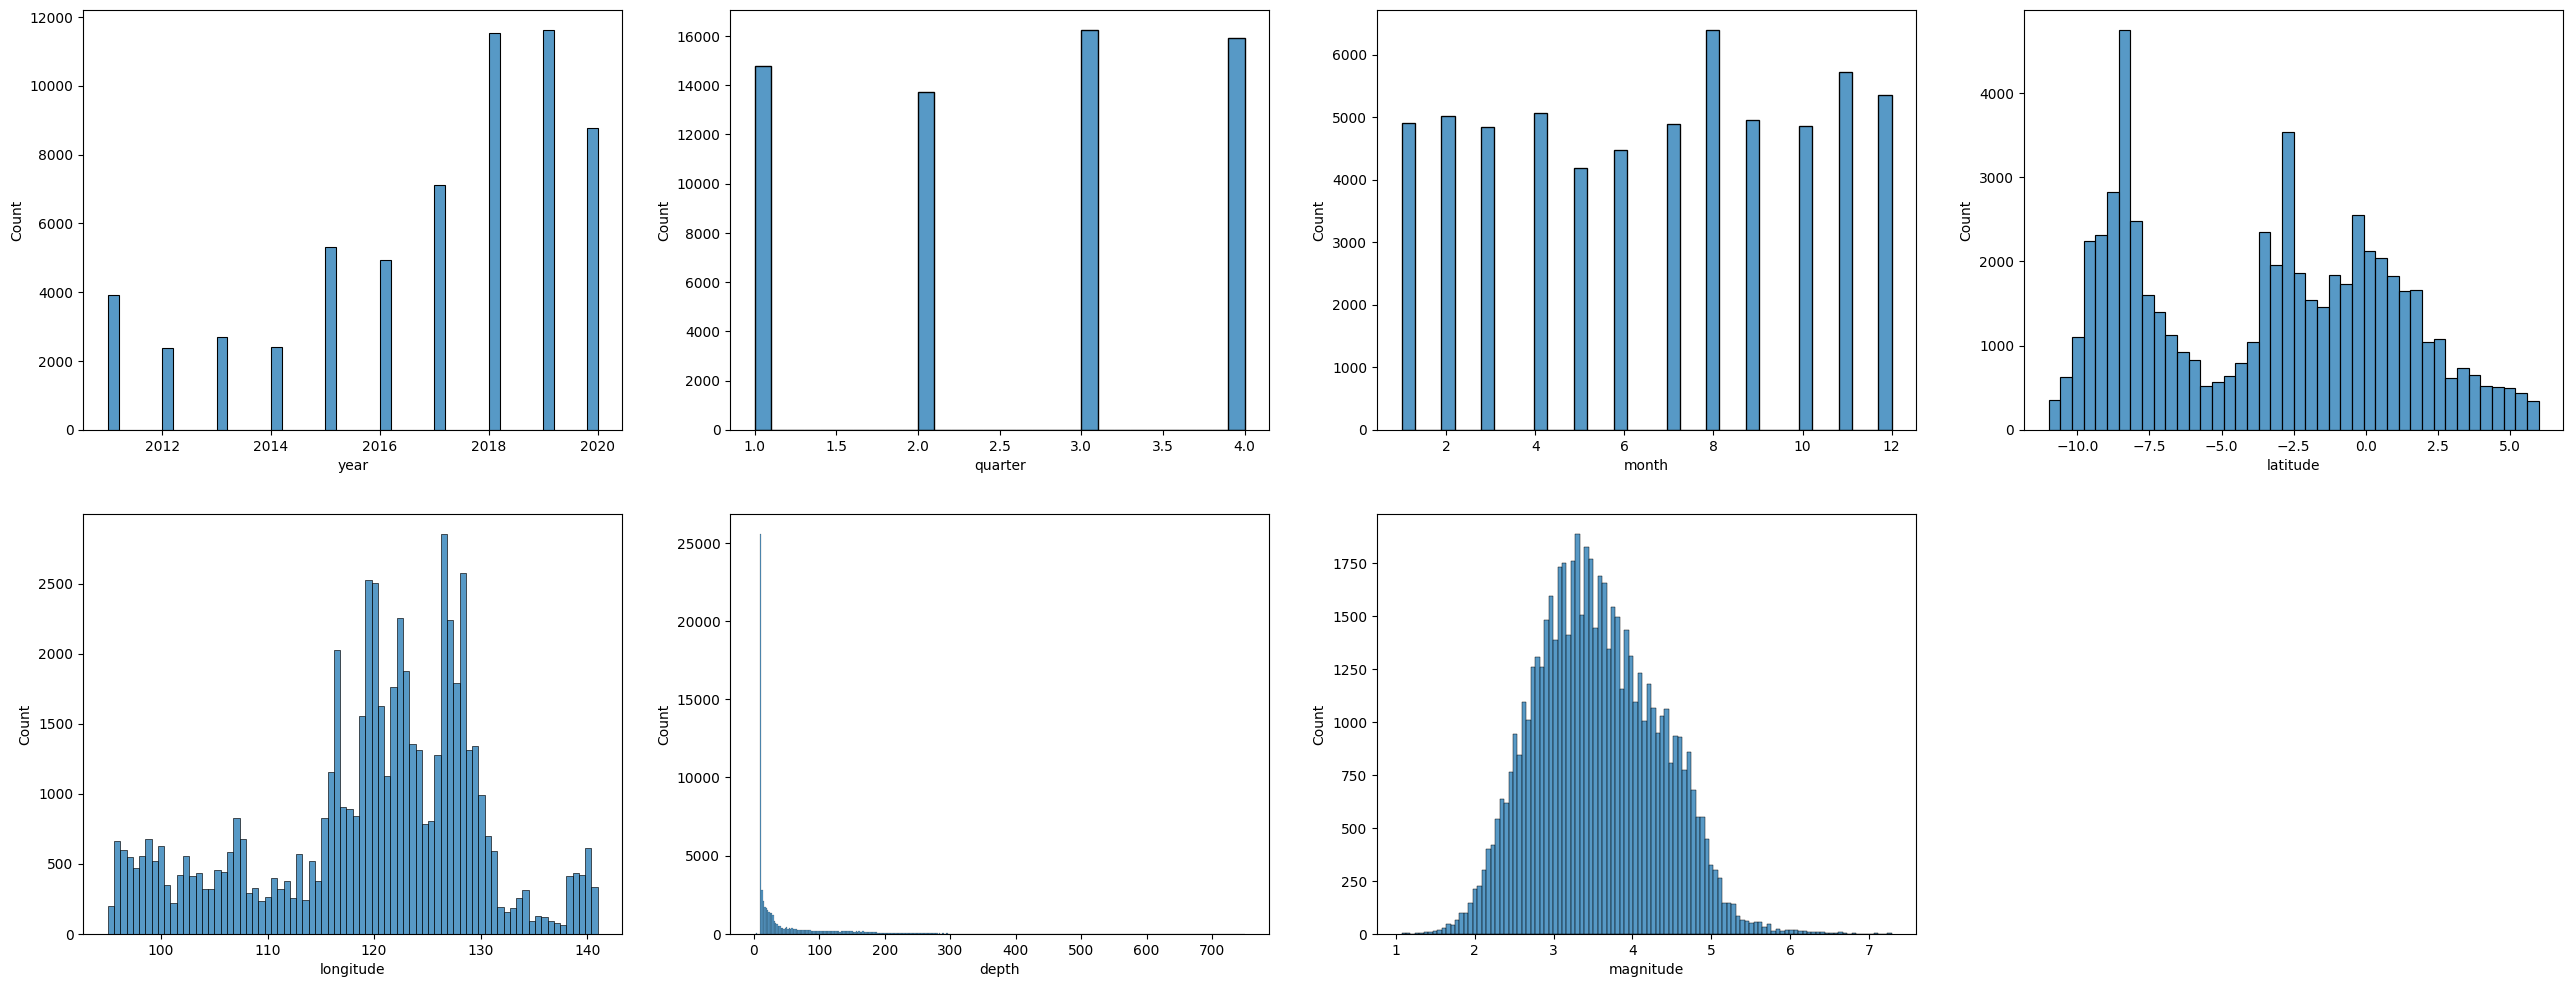

In [15]:
plt.figure(figsize = (32,12)) 
subplot = 1
for i in numf:
    plt.subplot(2,4,subplot)
    sns.histplot(data = df, x = i)
    subplot = subplot + 1
    
plt.show()


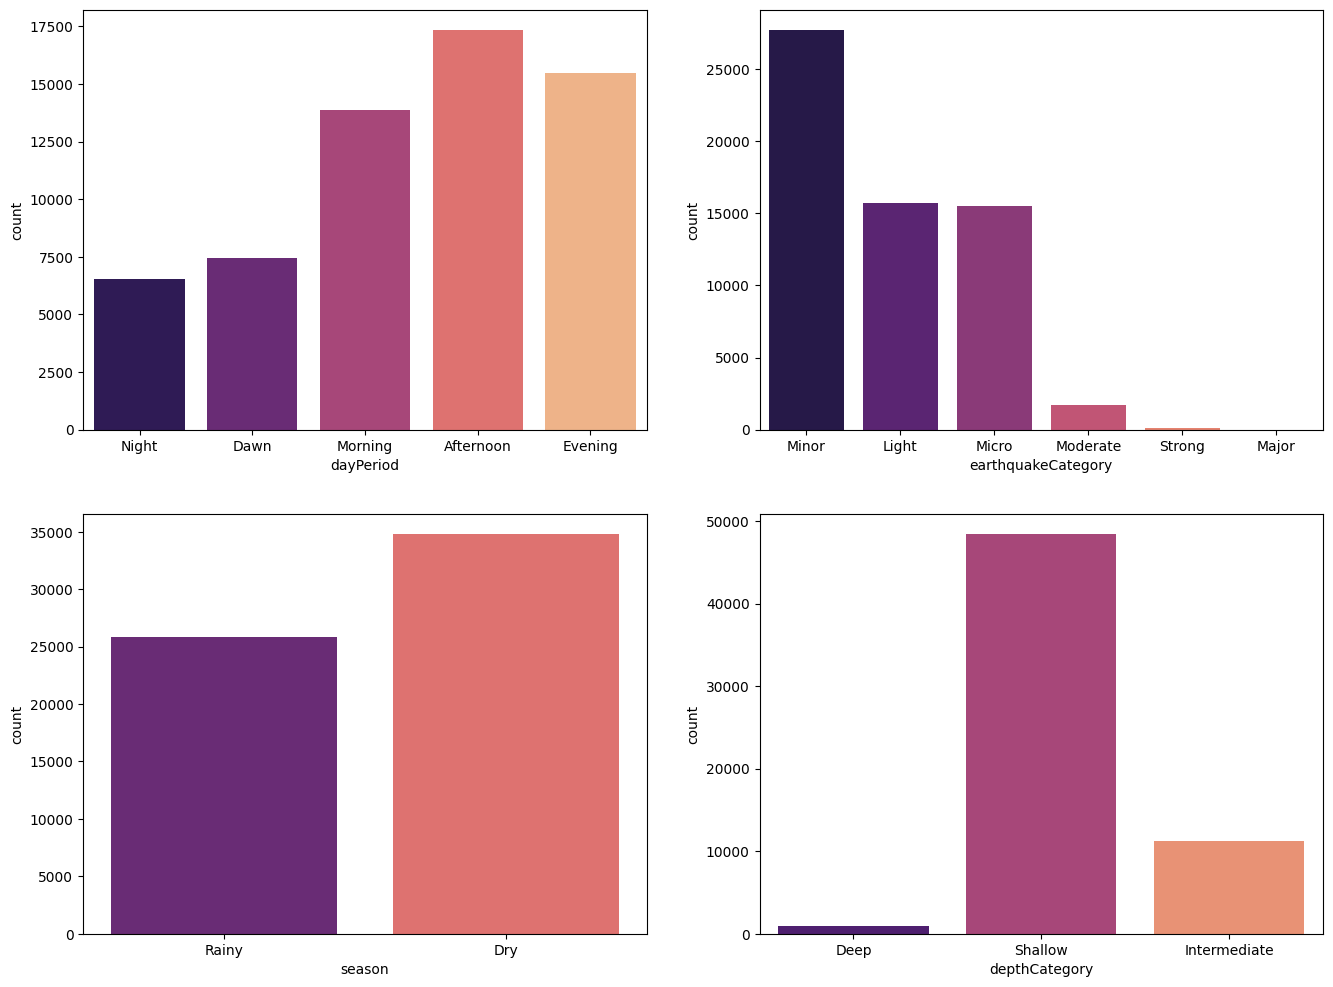

In [16]:
plt.figure(figsize = (16,12)) 
subplot = 1
for i in catf:
    plt.subplot(2,2,subplot)
    sns.countplot(data = df, x = i, palette = 'magma')
    subplot = subplot + 1
    
plt.show()

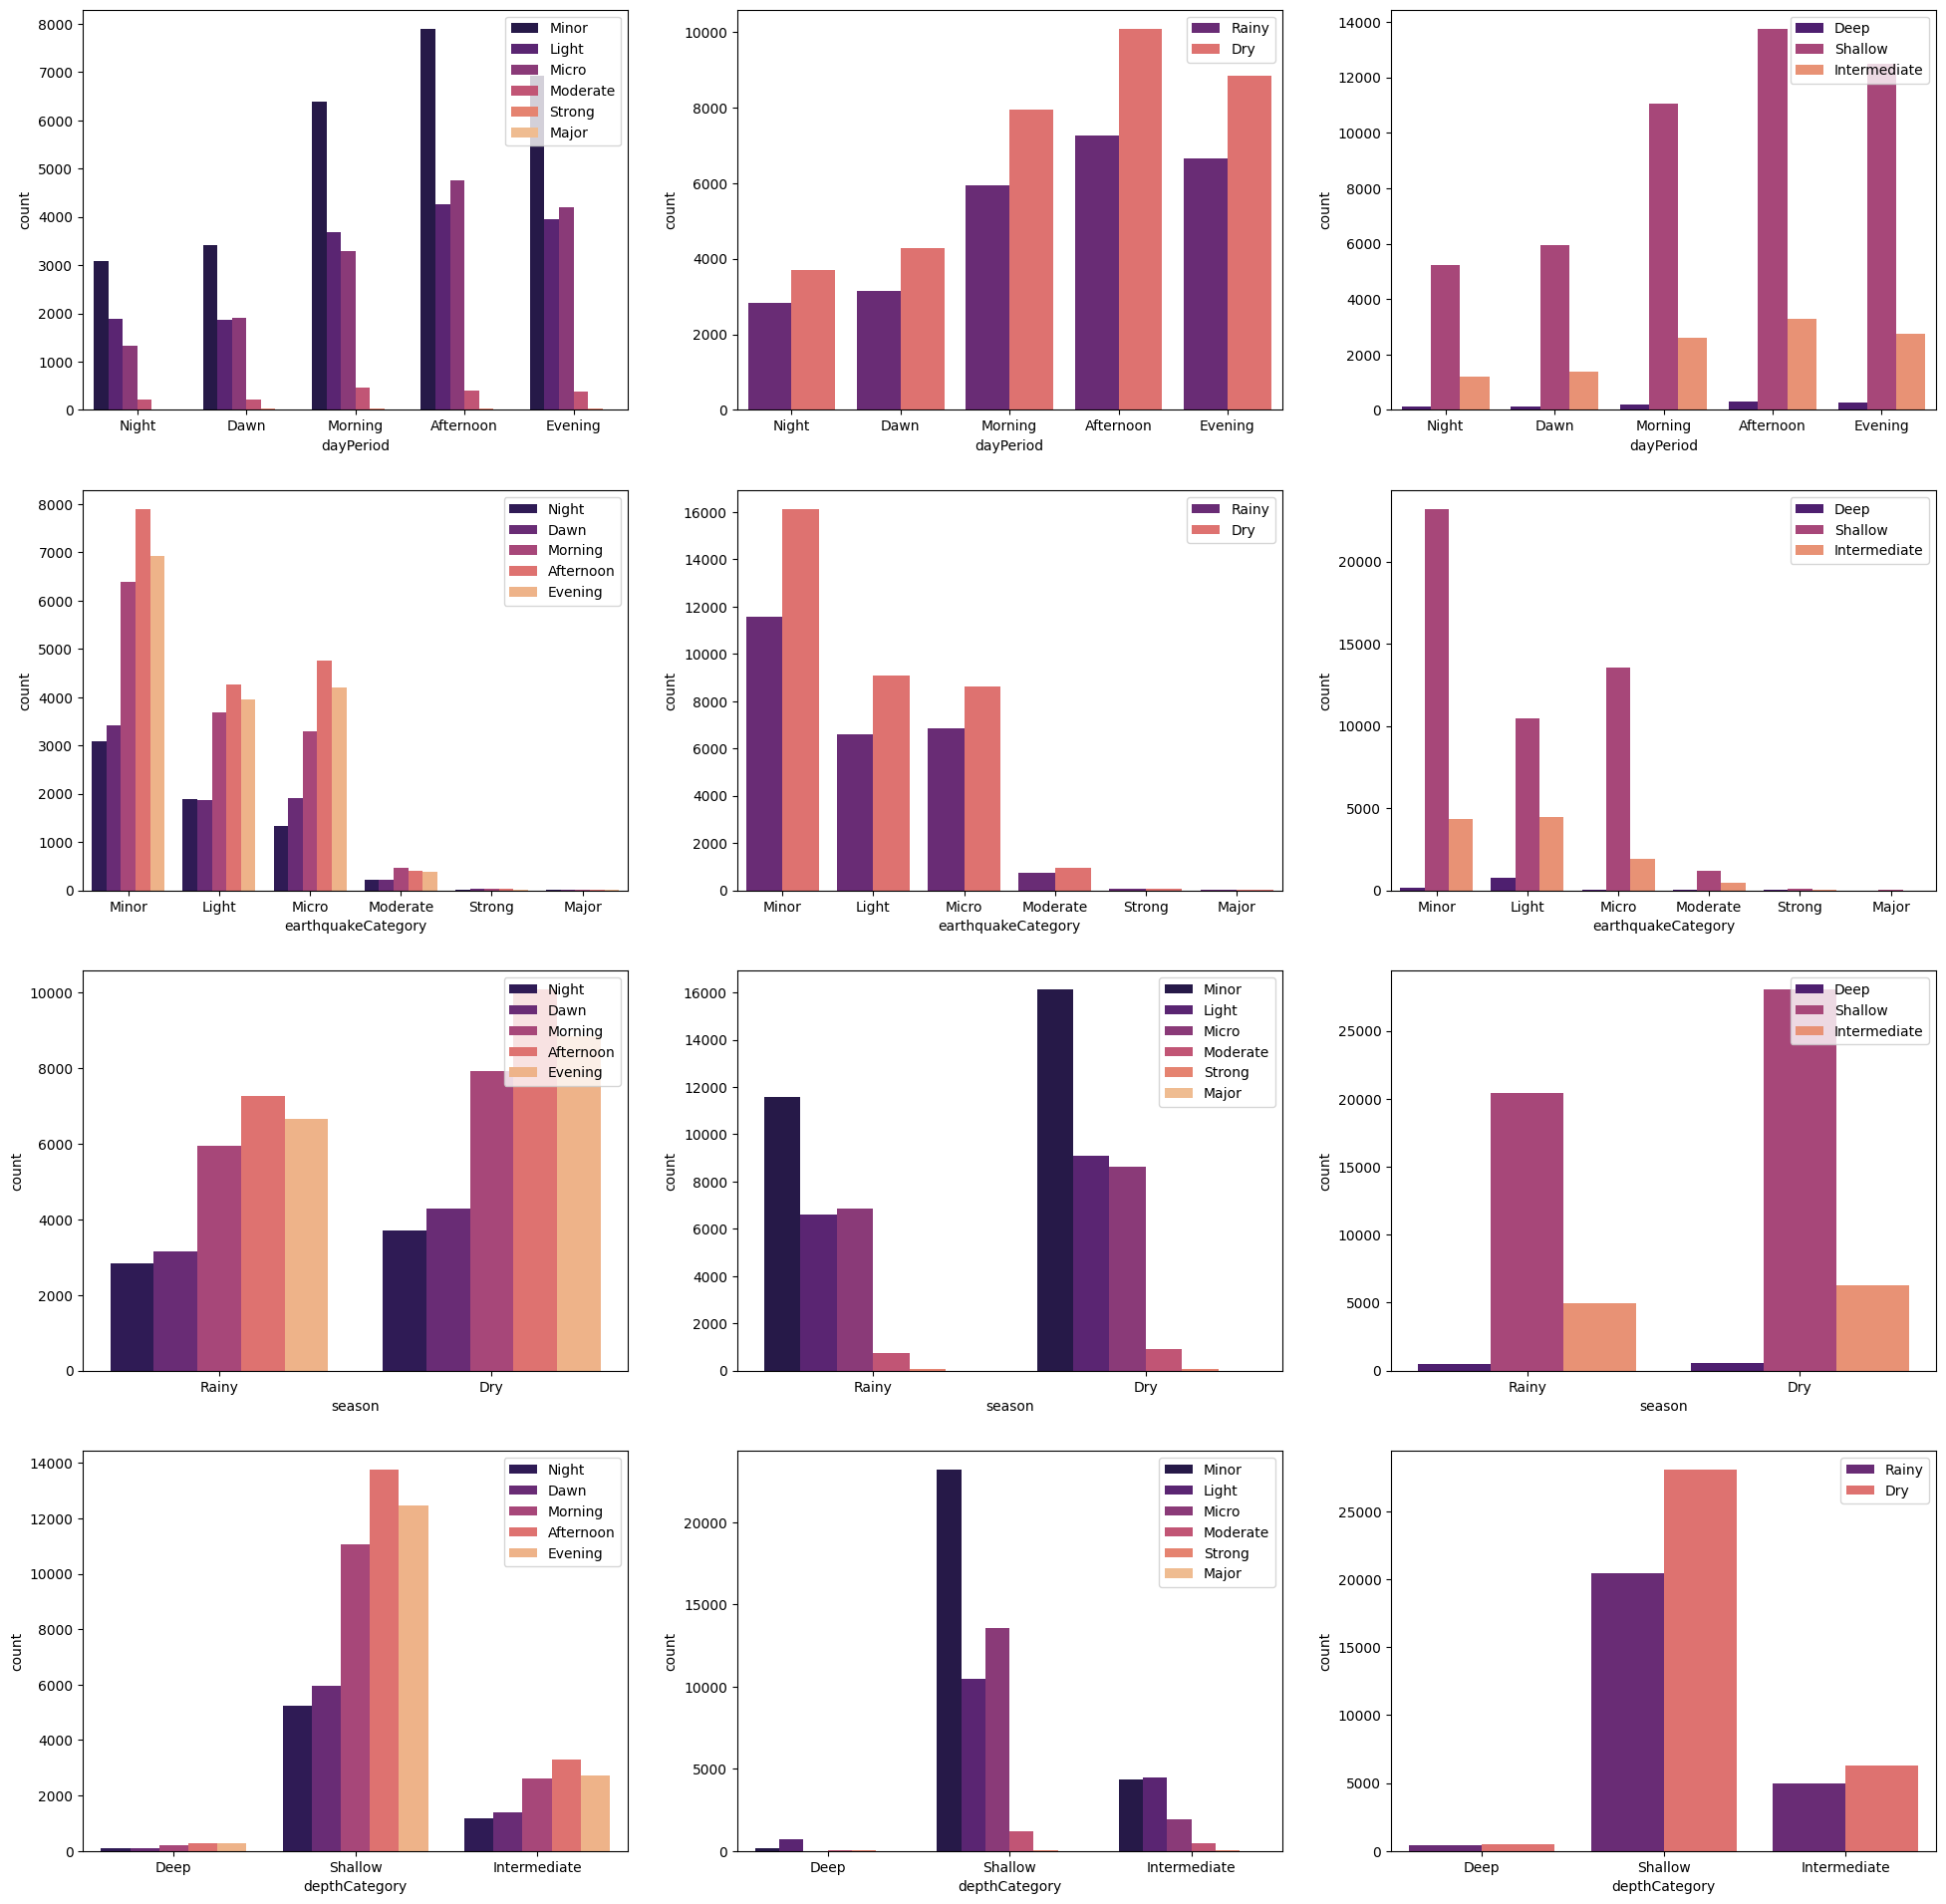

In [17]:
subplot = 1
plt.figure(figsize = (24,24))
for i in catf:
    for j in catf:
        if (i==j):
            pass
        else:
            plt.subplot(4,3,subplot)
            sns.countplot(data = df, x = i,hue= j,palette = 'magma')
            plt.legend(loc=1) 
            subplot = subplot +1
plt.show()


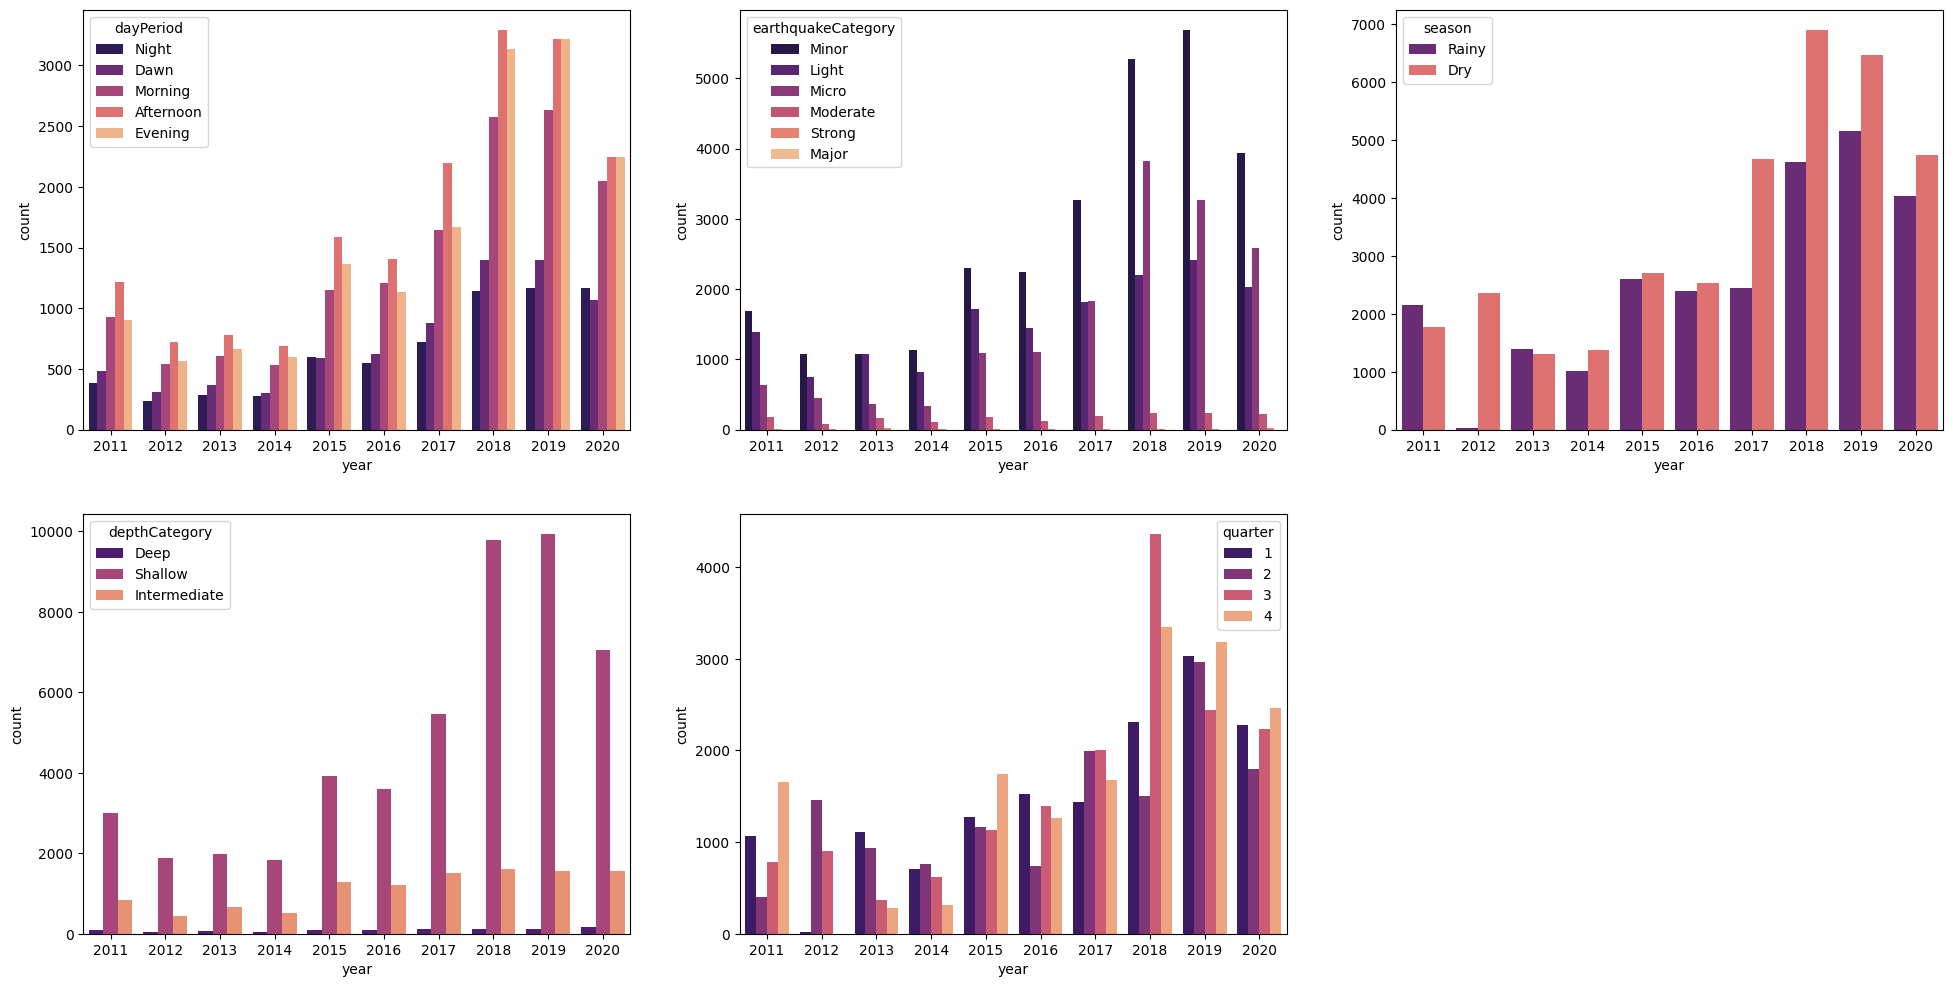

In [18]:
tempList = ['dayPeriod', 'earthquakeCategory', 'season', 'depthCategory', 'quarter']
subplot = 1
plt.figure(figsize = (24,12))
for i in tempList:
    plt.subplot(2,3,subplot)
    sns.countplot(data = df, x = 'year',hue = i, palette = 'magma')
    subplot = subplot + 1
plt.show()

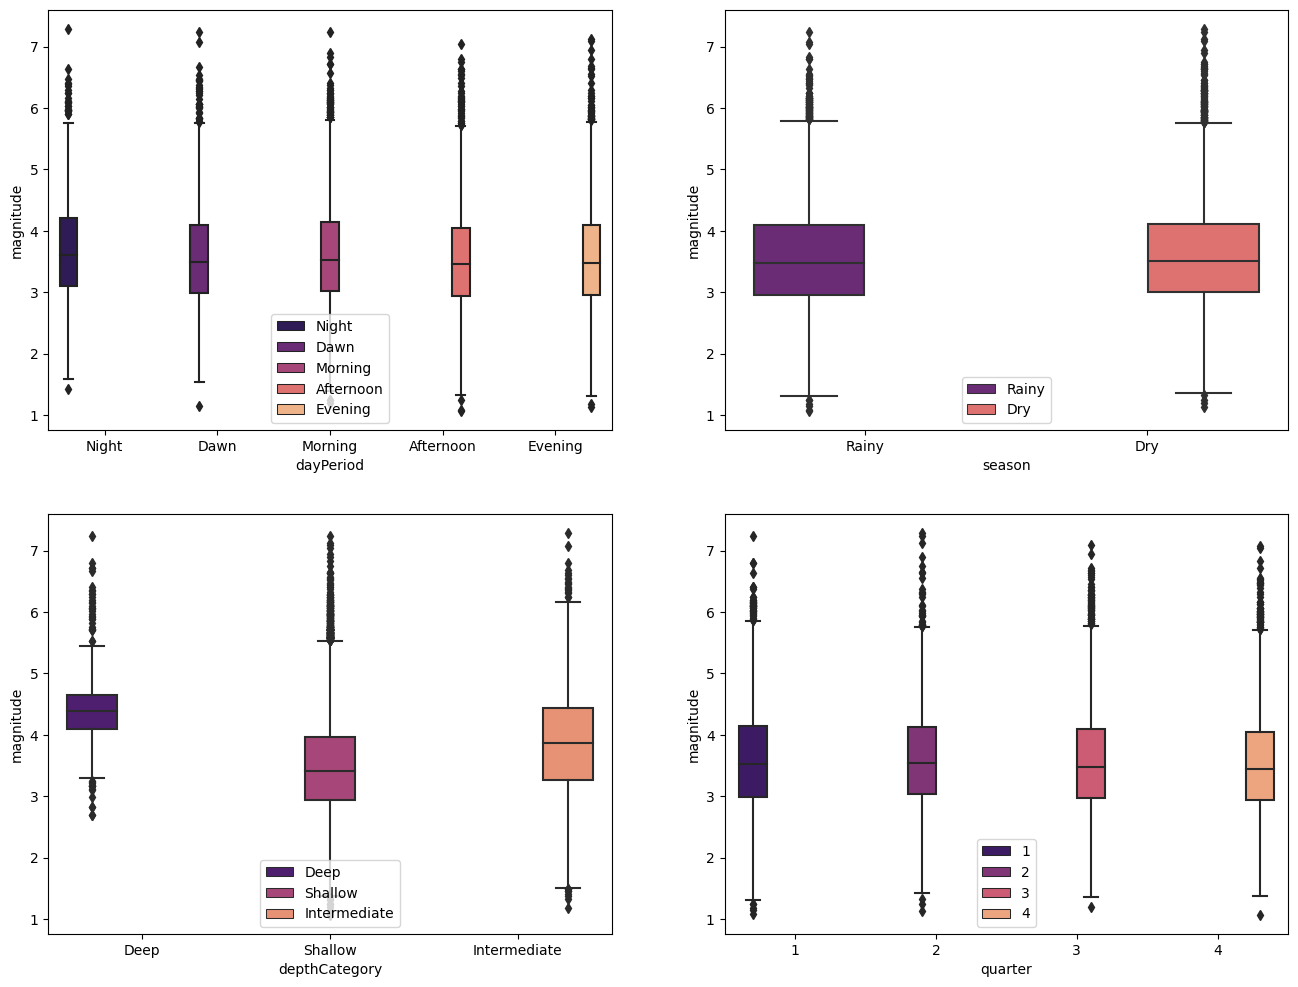

In [19]:
tempList = ['dayPeriod', 'season', 'depthCategory', 'quarter']
subplot = 1
plt.figure(figsize = (16,12))
for i in tempList:
    plt.subplot(2,2,subplot)
    sns.boxplot(data = df, y = 'magnitude', x = i, hue = i, palette = 'magma')
    plt.legend(loc=8)
    subplot = subplot + 1
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


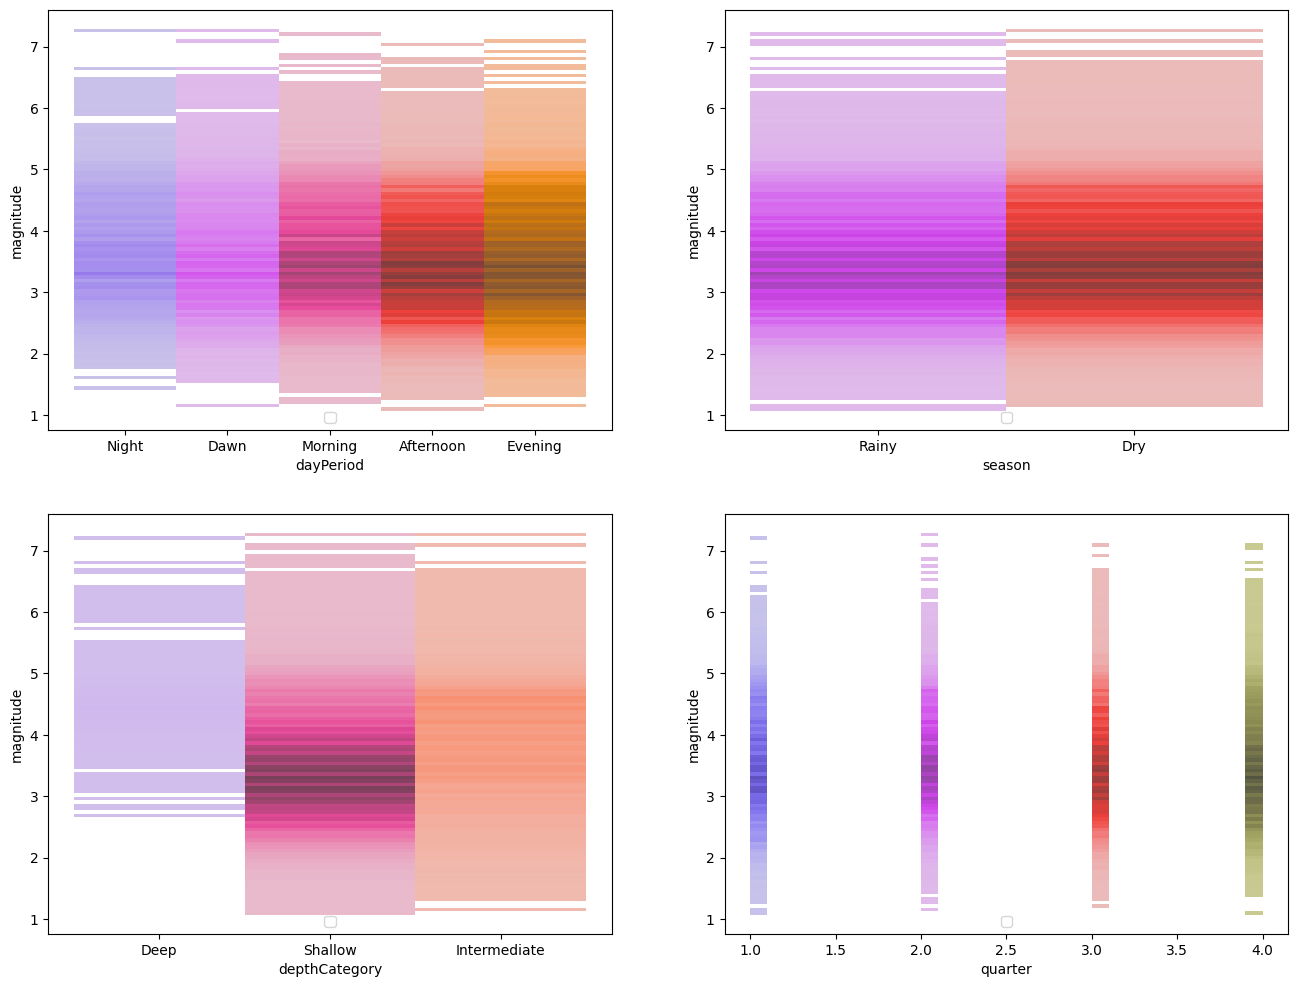

In [20]:
subplot = 1
plt.figure(figsize = (16,12))
for i in tempList:
    plt.subplot(2,2,subplot)
    sns.histplot(data = df, y = 'magnitude', x = i, hue = i, palette = 'magma')
    plt.legend(loc=8)
    subplot = subplot + 1
plt.show()

In [21]:
tempDf = df[['longitude','latitude']].copy()
ms = MinMaxScaler()
tempDf = ms.fit_transform(tempDf)
tempDf = pd.DataFrame(tempDf, columns=['longitude','latitude'])
tempDf.head()

,longitude,latitude
0,0.552681,0.204118
1,0.723105,0.783529
2,0.597605,0.700000
3,0.268884,0.237059
4,0.496667,0.294118


In [22]:
kMeans = KMeans(n_clusters=3)
kMeans.fit(tempDf[['longitude','latitude']]) 
df['area'] = kMeans.labels_
df.head()

,year,quarter,month,latitude,longitude,depth,magnitude,dayPeriod,earthquakeCategory,season,depthCategory,area
0,2011,1,1,-7.53,120.41418,512.6,3.86,Night,Minor,Rainy,Deep,1
1,2011,1,1,2.32,128.25015,46.1,4.77,Night,Light,Rainy,Shallow,2
2,2011,1,1,0.90,122.47974,70.1,4.06,Night,Light,Rainy,Shallow,2
3,2011,1,1,-6.97,107.36543,31.6,3.34,Night,Minor,Rainy,Shallow,1
4,2011,1,1,-6.00,117.83872,10.0,3.54,Dawn,Minor,Rainy,Shallow,1


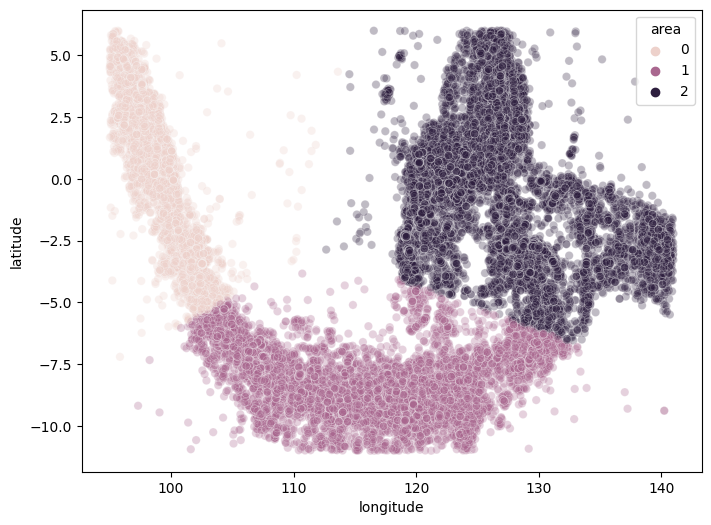

In [23]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, y = 'latitude', x = 'longitude', hue = 'area', alpha = 0.3)
plt.show()

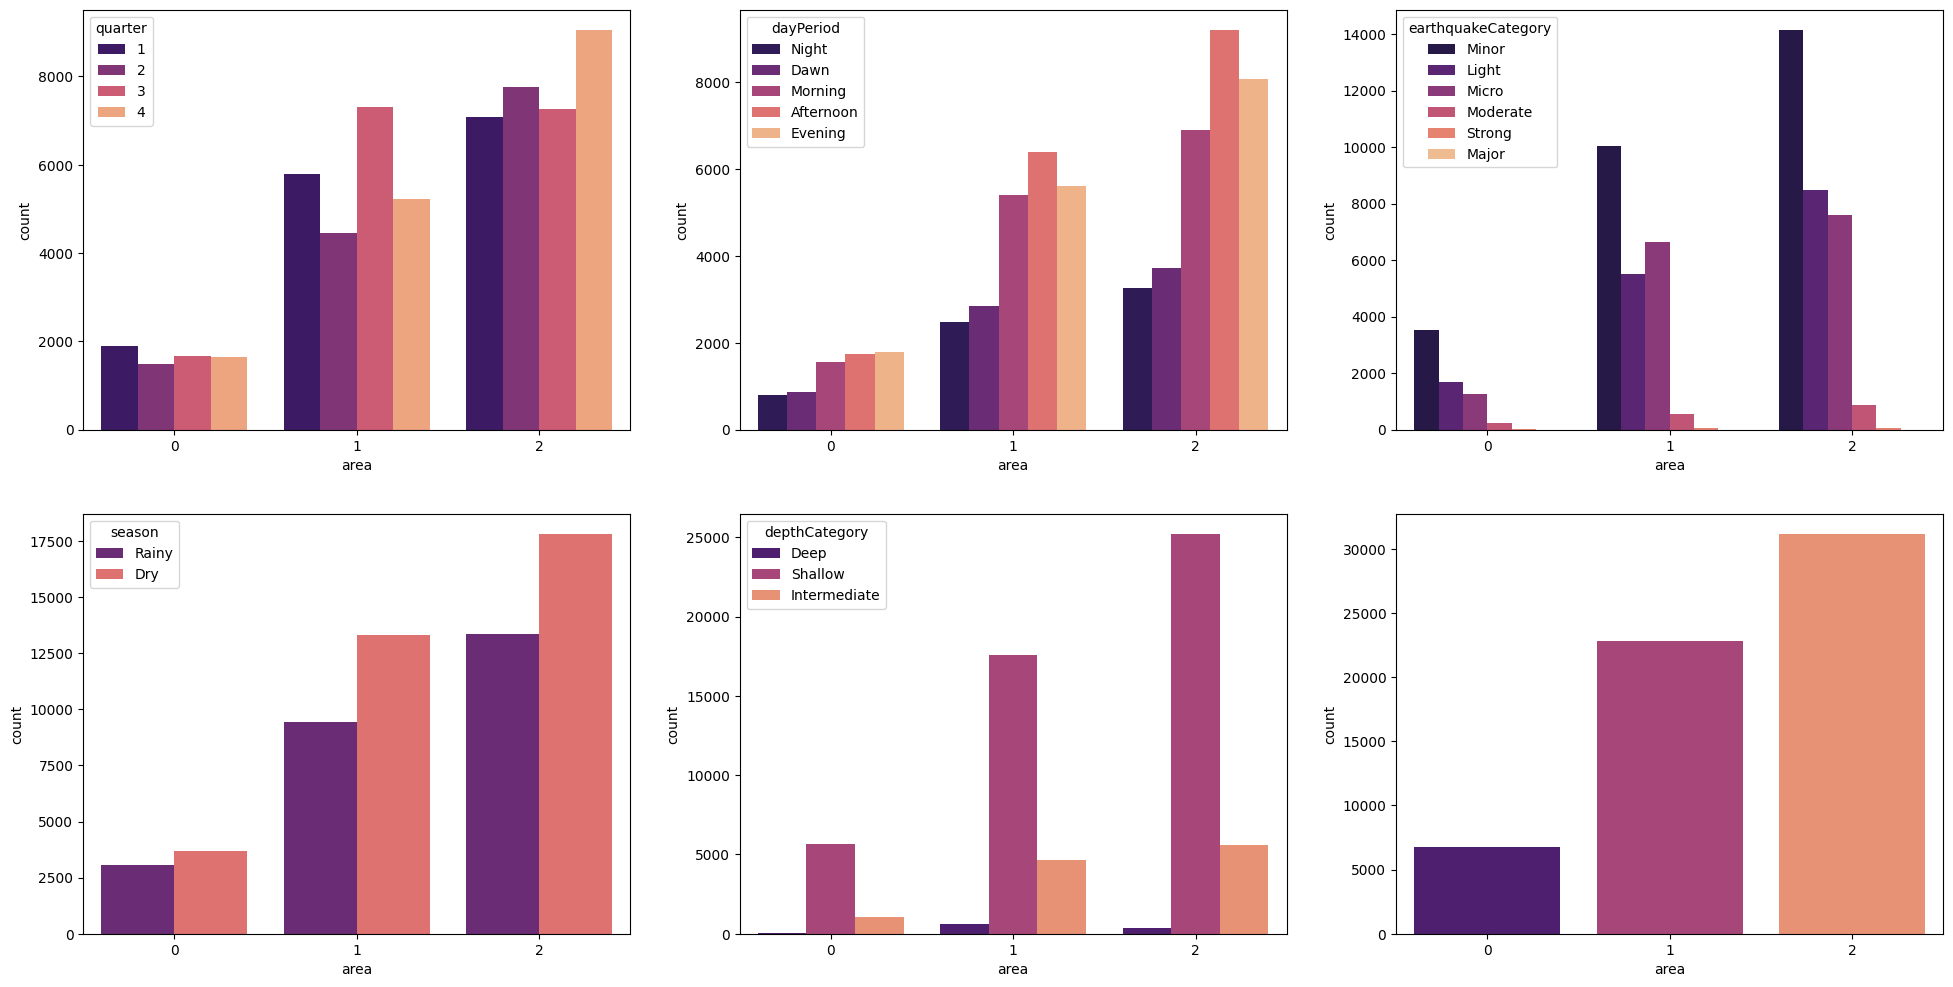

In [24]:
tempList = ['quarter', 'dayPeriod', 'earthquakeCategory', 'season', 'depthCategory']
subplot = 1
plt.figure(figsize = (24,12))
for i in tempList:
    plt.subplot(2,3,subplot)
    sns.countplot(data = df, x = 'area', hue = i, palette = 'magma')
    subplot = subplot +1
plt.subplot(2,3,6)
sns.countplot(data = df, x = 'area', palette = 'magma')
plt.show()

In [25]:
tempDf = df[['dayPeriod','earthquakeCategory','season','depthCategory','area']].copy()
le = LabelEncoder()
for i in tempDf.columns.tolist():
    tempDf[i] = le.fit_transform(tempDf[i])
tempDf.head()

,dayPeriod,earthquakeCategory,season,depthCategory,area
0,4,3,1,0,1
1,4,0,1,2,2
2,4,0,1,2,2
3,4,3,1,2,1
4,1,3,1,2,1


In [26]:
ms = MinMaxScaler()
tempDf = ms.fit_transform(tempDf)
tempDf = pd.DataFrame(tempDf, columns=['dayPeriod','earthquakeCategory','season','depthCategory','area'])
tempDf.head()

,dayPeriod,earthquakeCategory,season,depthCategory,area
0,1.00,0.6,1.0,0.0,0.5
1,1.00,0.0,1.0,1.0,1.0
2,1.00,0.0,1.0,1.0,1.0
3,1.00,0.6,1.0,1.0,0.5
4,0.25,0.6,1.0,1.0,0.5


In [27]:
kMeans = KMeans(n_clusters=9)
kMeans.fit(tempDf[['dayPeriod','earthquakeCategory','season','depthCategory','area']]) 
df['cluster1_9'] = kMeans.labels_
df.head()


,year,quarter,month,latitude,longitude,depth,magnitude,dayPeriod,earthquakeCategory,season,depthCategory,area,cluster1_9
0,2011,1,1,-7.53,120.41418,512.6,3.86,Night,Minor,Rainy,Deep,1,8
1,2011,1,1,2.32,128.25015,46.1,4.77,Night,Light,Rainy,Shallow,2,7
2,2011,1,1,0.90,122.47974,70.1,4.06,Night,Light,Rainy,Shallow,2,7
3,2011,1,1,-6.97,107.36543,31.6,3.34,Night,Minor,Rainy,Shallow,1,8
4,2011,1,1,-6.00,117.83872,10.0,3.54,Dawn,Minor,Rainy,Shallow,1,0


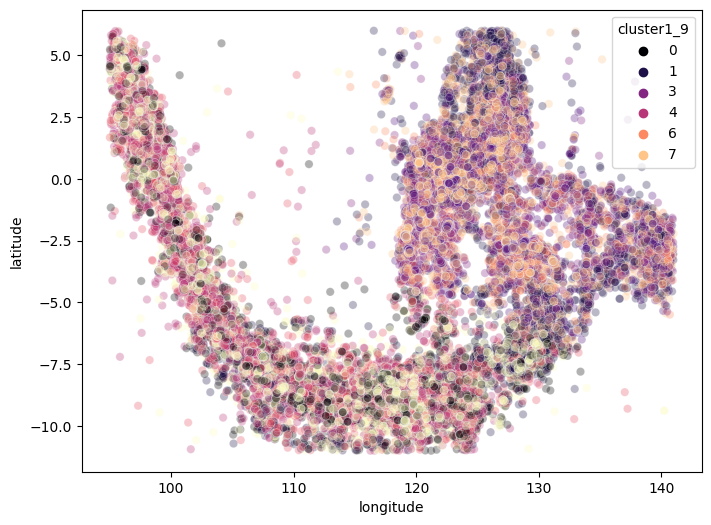

In [28]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, y = 'latitude', x = 'longitude', hue = 'cluster1_9', alpha = 0.3, palette = 'magma')
plt.show()

In [29]:
tempList1 = ['latitude','longitude','depth','magnitude']
tempList2 = ['earthquakeType','dataAmount','percentage'] + tempList1
eT = 1
tempList3 = []
dflen = len(df)
for i in df['cluster1_9'].unique().tolist():
    tempList4 = []
    tempList4.append(i)
    typelen = len(df.loc[df['cluster1_9']==i])
    tempList4.append(typelen)
    typepercent = round((typelen/dflen)*100,2)
    tempList4.append(typepercent)
    for j in tempList1:
        q25 = str(round(df[j].loc[df['cluster1_9']==i].min(),2))
        q75 = str(round(df[j].loc[df['cluster1_9']==i].max(),2))
        if (q25==q75):
            tempList4.append(q25)
        else:
            tempList4.append("("+q25+") - ("+q75+")")
    tempList3.append(tempList4)
tempdf = pd.DataFrame(tempList3,columns = tempList2)
tempdf

,earthquakeType,dataAmount,percentage,latitude,longitude,depth,magnitude
0,8,7556,12.45,(-11.0) - (6.0),(95.04) - (140.23),(1.0) - (750.0),(1.49) - (6.8)
1,7,7872,12.97,(-6.54) - (6.0),(114.54) - (140.98),(3.0) - (750.0),(1.18) - (7.23)
2,0,4953,8.16,(-11.0) - (5.77),(95.0) - (133.4),(1.0) - (750.0),(1.62) - (6.8)
3,2,5469,9.01,(-6.5) - (6.0),(114.1) - (140.97),(2.0) - (700.0),(1.07) - (7.07)
4,4,8406,13.85,(-11.0) - (5.99),(95.01) - (132.49),(1.0) - (659.1),(1.4) - (7.29)
5,1,6980,11.50,(-10.99) - (6.0),(101.52) - (140.97),(5.0) - (682.9),(2.83) - (7.12)
6,6,4529,7.46,(-6.42) - (5.91),(114.62) - (140.94),(6.9) - (750.0),(1.2) - (6.89)
7,5,6517,10.74,(-11.0) - (5.87),(95.01) - (137.24),(3.0) - (750.0),(1.48) - (6.75)
8,3,8399,13.84,(-6.45) - (5.99),(112.65) - (140.96),(1.0) - (750.0),(1.13) - (7.24)


In [30]:
tempdf.sort_values(by='percentage',ascending = False)

,earthquakeType,dataAmount,percentage,latitude,longitude,depth,magnitude
4,4,8406,13.85,(-11.0) - (5.99),(95.01) - (132.49),(1.0) - (659.1),(1.4) - (7.29)
8,3,8399,13.84,(-6.45) - (5.99),(112.65) - (140.96),(1.0) - (750.0),(1.13) - (7.24)
1,7,7872,12.97,(-6.54) - (6.0),(114.54) - (140.98),(3.0) - (750.0),(1.18) - (7.23)
0,8,7556,12.45,(-11.0) - (6.0),(95.04) - (140.23),(1.0) - (750.0),(1.49) - (6.8)
5,1,6980,11.50,(-10.99) - (6.0),(101.52) - (140.97),(5.0) - (682.9),(2.83) - (7.12)
7,5,6517,10.74,(-11.0) - (5.87),(95.01) - (137.24),(3.0) - (750.0),(1.48) - (6.75)
3,2,5469,9.01,(-6.5) - (6.0),(114.1) - (140.97),(2.0) - (700.0),(1.07) - (7.07)
2,0,4953,8.16,(-11.0) - (5.77),(95.0) - (133.4),(1.0) - (750.0),(1.62) - (6.8)
6,6,4529,7.46,(-6.42) - (5.91),(114.62) - (140.94),(6.9) - (750.0),(1.2) - (6.89)


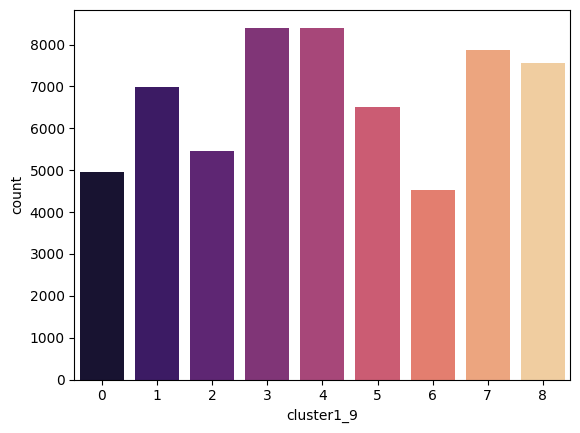

In [31]:
sns.countplot(data =df , x = 'cluster1_9', palette = 'magma')
plt.show()


In [32]:
tempDf = df[['depth','magnitude']].copy()
ms = MinMaxScaler()
tempDf = ms.fit_transform(tempDf)
tempDf = pd.DataFrame(tempDf, columns=['depth','magnitude'])
tempDf.head()

,depth,magnitude
0,0.683044,0.448553
1,0.060214,0.594855
2,0.092256,0.480707
3,0.040854,0.364952
4,0.012016,0.397106


In [33]:
kMeans = KMeans(n_clusters=3)
kMeans.fit(tempDf[['depth','magnitude']]) 
df['cluster2_3'] = kMeans.labels_
df.head()

,year,quarter,month,latitude,longitude,depth,magnitude,dayPeriod,earthquakeCategory,season,depthCategory,area,cluster1_9,cluster2_3
0,2011,1,1,-7.53,120.41418,512.6,3.86,Night,Minor,Rainy,Deep,1,8,1
1,2011,1,1,2.32,128.25015,46.1,4.77,Night,Light,Rainy,Shallow,2,7,2
2,2011,1,1,0.90,122.47974,70.1,4.06,Night,Light,Rainy,Shallow,2,7,2
3,2011,1,1,-6.97,107.36543,31.6,3.34,Night,Minor,Rainy,Shallow,1,8,0
4,2011,1,1,-6.00,117.83872,10.0,3.54,Dawn,Minor,Rainy,Shallow,1,0,0


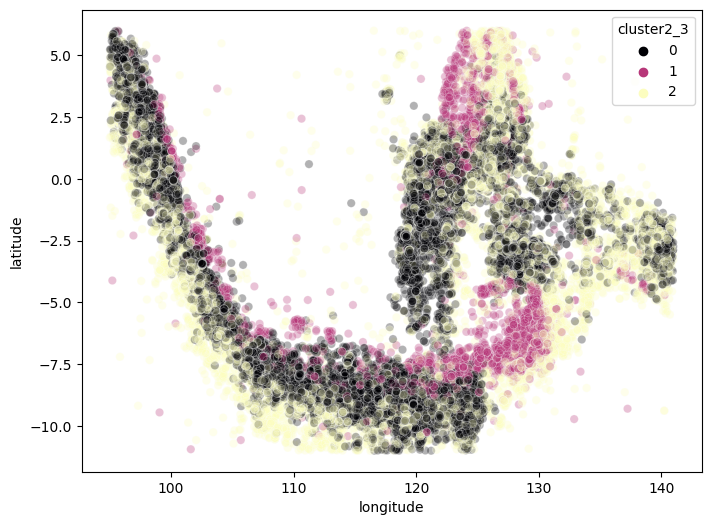

In [34]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, y = 'latitude', x = 'longitude', hue = 'cluster2_3', alpha = 0.3, palette = 'magma')
plt.show()


In [35]:
tempList1 = ['depth','magnitude']
tempList2 = ['earthquakeType','dataAmount','percentage'] + tempList1
eT = 1
tempList3 = []
dflen = len(df)
for i in df['cluster2_3'].unique().tolist():
    tempList4 = []
    tempList4.append(i)
    typelen = len(df.loc[df['cluster2_3']==i])
    tempList4.append(typelen)
    typepercent = round((typelen/dflen)*100,2)
    tempList4.append(typepercent)
    for j in tempList1:
        q25 = str(round(df[j].loc[df['cluster2_3']==i].min(),2))
        q75 = str(round(df[j].loc[df['cluster2_3']==i].max(),2))
        if (q25==q75):
            tempList4.append(q25)
        else:
            tempList4.append("("+q25+") - ("+q75+")")
    tempList3.append(tempList4)
tempdf = pd.DataFrame(tempList3,columns = tempList2)
tempdf

,earthquakeType,dataAmount,percentage,depth,magnitude
0,1,5172,8.52,(135.1) - (750.0),(2.11) - (7.29)
1,2,23277,38.36,(5.0) - (138.5),(3.57) - (7.24)
2,0,32232,53.12,(1.0) - (244.0),(1.07) - (3.59)


In [36]:
tempdf.sort_values(by='percentage',ascending = False)

,earthquakeType,dataAmount,percentage,depth,magnitude
2,0,32232,53.12,(1.0) - (244.0),(1.07) - (3.59)
1,2,23277,38.36,(5.0) - (138.5),(3.57) - (7.24)
0,1,5172,8.52,(135.1) - (750.0),(2.11) - (7.29)


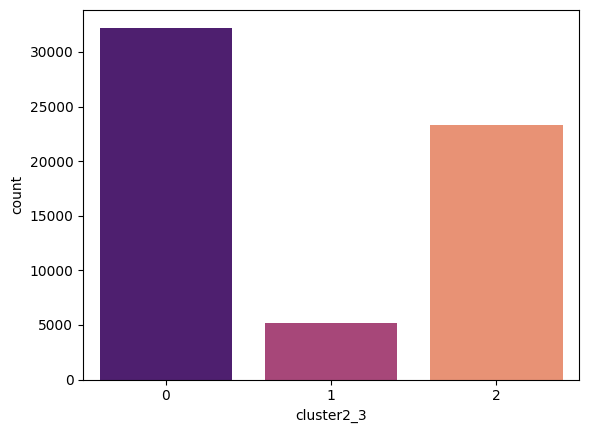

In [37]:
sns.countplot(data =df , x = 'cluster2_3', palette = 'magma')
plt.show()
